### BRAUX-GUILLIN Valentin, ASSEMAT Quentin <br/> École Polytechnique, June 2020

# Paradoxe de Parrondo

Nous commençons par importer les différentes bibliothèques avec les alias canoniques et les différents paramètres qui nous seront utiles dans tout le projet. Les bibliothèques ```fractions``` et ```sympy```servent au calcul matriciel et à la résolution de systèmes linéaires de manière exacte avec des fractions (ce qui n'est pas possible avec ```numpy```).

In [1]:
%matplotlib inline
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from math import floor
from fractions import Fraction
from sympy.matrices import Matrix, zeros, det
from sympy.functions import transpose

eps = 1/1000
p = 1/2 - eps
p0 = 1/10 - eps
p1 = 3/4 - eps

## Partie 1 : Études des deux jeux

### Question T1
Notons $A_{i}$ le gain du jeu $A$ au tour $i$. Les variables aléatoires $A_{i}$ sont indépendantes, identiquement distribuées et d'espérance $-2\varepsilon$.
<br/>
Le gain total après le tour $n$ est donné par $S_{n}^A = \sum\limits_{i=1}^{n}A_{i}$.
<br/>
D'après la loi des grands nombres :
\begin{equation*}
\frac{S_{n}^A}{n} \overset{p.s}{\underset{n\to +\infty}{\longrightarrow}} -2 \varepsilon
\end{equation*}
Ainsi pour tout $\varepsilon > 0$ nous avons :
\begin{equation*}
S_{n}^A\overset{p.s}{\underset{n\to +\infty}{\longrightarrow}} -\infty
\end{equation*}
Nous n'avons donc pas envie de jouer à ce jeu.

### Question S1
Ci-dessous, les différents programmes qui permettent d'afficher l'évolution du gain sur plusieurs trajectoires et un histogramme de la loi de $S_{n}^A$.

In [2]:
#Renvoie l'évolution du gain total jusqu'à l'étape n du jeu A.

def trajectoireJeuA (n):
    N = npr.rand(n) #n variables aléatoires uniformes sur [0,1[
    S = np.zeros(n+1) #S[i] représente le gain après i lancers
    S[0] = 0
    for i in range (1,n+1) :
        if (N[i-1] <= p) :
            S[i] = S[i-1] + 1
        else :
            S[i] = S[i-1] - 1
    return(S)

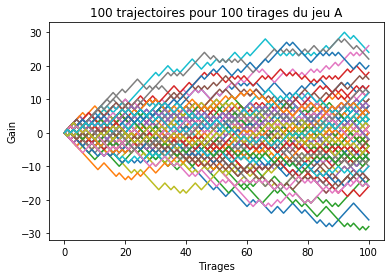

In [3]:
#Affiche une superposition de trajectoires pour le gain total du jeu A.

def superpositionJeuA (nb_traj,n) :
    X = np.arange(n+1)
    for i in range (nb_traj) :
        plt.plot(X,trajectoireJeuA(n))
    plt.xlabel("Tirages")
    plt.ylabel("Gain")
    plt.title(f"{nb_traj} trajectoires pour {n} tirages du jeu A")
    plt.show()

nb_traj = 100
n = 100
    
superpositionJeuA(nb_traj,n)

In [4]:
#Renvoie la valeur Sn pour un n donné pour le jeu A.

def jeuA (n) :
    return trajectoireJeuA(n)[n]

Dans le programme suivant, on s'arrange pour utiliser la fonction ```bincount``` qui ne prend en argument que des tableaux d'entiers positifs.
On applique donc ```bincount```à l'échantillon translaté de son minimum (ce qui nous assure la positivité de l'échantillon).
<br/>
Cela ne pose pas de problème puisque notre ```arange``` commence bien au minimum.

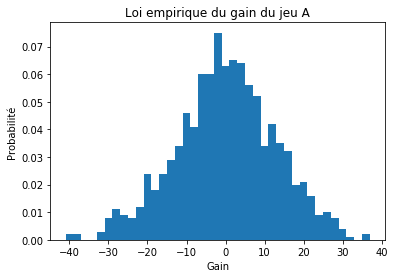

In [5]:
#Affiche un histogramme de la loi de Sn pour le jeu A.

def histogrammeJeuA (nb_sim,n) :
    sample = np.zeros(nb_sim, dtype=np.int)
    for i in range (nb_sim) :
        sample[i] = jeuA(n)
    a = np.min(sample)
    b = np.max(sample)
    X = np.arange(b-a+1) + a
    proba = np.bincount(sample-a)/nb_sim
    plt.bar(X, proba, width=2.0)
    plt.xlabel("Gain")
    plt.ylabel("Probabilité")
    plt.title("Loi empirique du gain du jeu A")
    plt.show()
    
nb_sim = 1000
n = 150

histogrammeJeuA(nb_sim,n)

### Question S2
Ci-dessous, les différents programmes qui permettent d'afficher l'évolution du gain sur plusieurs trajectoires et un histogramme de la loi de $S_{n}^B$.

In [6]:
#Renvoie l'évolution du gain total jusqu'à l'étape n du jeu B.

def trajectoireJeuB (n):
    N = npr.rand(n) #n variables aléatoires uniformes sur [0,1[
    S = np.zeros(n+1) #S[i] représente le gain après i lancers
    S[0] = 0
    for i in range (1,n+1) :
        if (S[i-1]%3 == 0) :
            if (N[i-1] <= p0) :
                S[i] = S[i-1] + 1
            else :
                S[i] = S[i-1] - 1
        else :
            if (N[i-1] <= p1) :
                S[i] = S[i-1] + 1
            else :
                S[i] = S[i-1] - 1
    return(S)

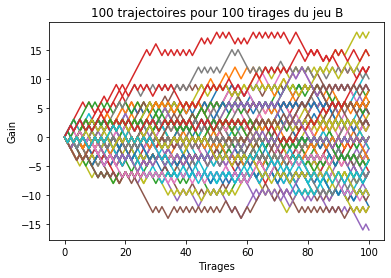

In [7]:
#Affiche une superposition de trajectoires pour le gain total du jeu B.

def superpositionJeuB (nb_traj,n) :
    X = np.arange(n+1)
    for i in range (nb_traj) :
        plt.plot(X,trajectoireJeuB(n))
    plt.xlabel("Tirages")
    plt.ylabel("Gain")
    plt.title(f"{nb_traj} trajectoires pour {n} tirages du jeu B")
    plt.show()
    
nb_traj = 100
n = 100
    
superpositionJeuB(nb_traj,n)

In [8]:
#Renvoie la valeur Sn pour un n donné pour le jeu B.

def jeuB (n) :
    return trajectoireJeuB(n)[n]

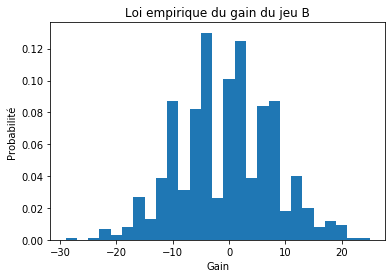

La moyenne expérimentale des gains après 150 lancers pour 1000 simulations vaut -0.558.


In [9]:
#Affiche un histogramme de la loi de Sn pour le jeu B.

def histogrammeJeuB (nb_sim,n) :
    sample = np.zeros(nb_sim, dtype=np.int)
    m = 0
    for i in range (nb_sim) :
        jeu = jeuB(n)
        sample[i] = jeu
        m += jeu
    M = m/nb_sim #moyenne des tirages
    a = np.min(sample)
    b = np.max(sample)
    X = np.arange(b-a+1) + a
    proba = np.bincount(sample-a)/nb_sim
    plt.bar(X, proba, width=2.0)
    plt.xlabel("Gain")
    plt.ylabel("Probabilité")
    plt.title("Loi empirique du gain du jeu B")
    plt.show()
    print(f"La moyenne expérimentale des gains après {n} lancers pour {nb_sim} simulations vaut {M}.")
    
nb_sim = 1000
n = 150

histogrammeJeuB(nb_sim,n)

Pour faciliter les conjectures, nous indiquons également la moyenne expérimentale des gains.

Au vu des simulations, nous conjecturons que :

\begin{equation*}
S_{n}^B\overset{p.s}{\underset{n\to +\infty}{\longrightarrow}} -\infty
\end{equation*}

Nous n'avons donc pas envie de jouer à ce jeu.

### Question T2

Nous procédons par disjonction de cas.

Cas 1 : $i \not= j$. Alors $k=1$ convient car $P(X_{n+1}=j~| X_n = i) = P_B(i,j) > 0$.

Cas 2 : $i = j$.Alors $k=2$ convient car :
\begin{align*}
P(X_{n+2}=i~| X{n}=i) &= \frac{1}{P(X_{n}=i)}~P(X_{n+2}=i,X_n=i) \\
                    & \geqslant \frac{1}{P(X_{n}=i)}~P(X_{n+2}=i,X_{n+1}=i+1,X_n = i) \\
                    &= \frac{1}{P(X_{n}=i)}~P(X_{n+2}=i~| X_{n+1}=i+1,X_{n}=i)~P(X_{n+1}=i+1,X_n=i) \\
                    &= P(X_{n+1}=i+1~| X_n = i)~P(X_{n+2}=i~| X_{n+1}=i+1,X_{n}=i)
\end{align*}

De plus $P(X_{n+2}=i~| X_{n+1}=i+1,X_{n}=i) = P(X_{n+2}=i~| X_{n+1}=i+1) > 0$ d'après ce qui précède, et de même $P(X_{n+1}=i+1~| X_n = i) > 0$.
<br/>
Nous en concluons donc $P(X_{n+2}=i~| X{n}=i) > 0$.

Ainsi pour toute paire $(i,j) \in \{0,1,2\}^2$, il existe un entier $k$ tel que $P(X_{n+k}=j~| X_n=i) \neq 0$.

### Question T3
Le résultat général sur les chaînes de Markov irréductibles à valeurs dans un ensemble fini nous donne trois relations.
<br/>
Nous remarquons qu'une de ces trois relations est une combinaison linéaires des deux autres.

Voici alors les relations qui nous intéressent :

\begin{equation*}
(1-p_{1})\pi_{B}(1) + p_{1}\pi_{B}(2) = \pi_{B}(0)
\end{equation*}
\begin{equation*}
p_{0}\pi_{B}(0) + (1-p_{1})\pi_{B}(2) = \pi_{B}(1)
\end{equation*}

De plus nous savons que :
\begin{equation*}
\pi_{B}(0) + \pi_{B}(1) + \pi_{B}(2) = 1
\end{equation*}

Nous allons donc résoudre ce système en le triangularisant :

\begin{cases}
\pi_{B}(0) = 1 - \pi_{B}(1) - \pi_{B}(2) \\
(1 - p_{1})\pi_{B}(1) + p_{1}\pi_{B}(2) - \pi_{B}(0) = 0 \\
p_{0}\pi_{B}(0) + (1 - p_{1})\pi_{B}(2) - \pi_{B}(1) = 0
\end{cases}

\begin{cases}
\pi_{B}(0) = 1 - \pi_{B}(1) - \pi_{B}(2) \\
(2 - p_{1})\pi_{B}(1) + (1 + p_{1})\pi_{B}(2) = 1 \\
(1 - p_{1} - p_{0})\pi_{B}(2) - (1 + p_{0})\pi_{B}(1) = -p_{0}
\end{cases}

\begin{cases}
\pi_{B}(0) = 1 - \pi_{B}(1) - \pi_{B}(2) \\
(2 - p_{1})\pi_{B}(1) + (1 + p_{1})\pi_{B}(2) = 1 \\
\pi_{B}(2) \left( (1 - p_{1} - p_{0})\frac{2 - p_{1}}{1 + p_{0}} + (1 + p_{1}) \right) = 1 - p_{0}\frac{2-p_{1}}{1 + p_{0}}
\end{cases}

En travaillant sur la dernière ligne nous obtenons :
\begin{equation*}
\pi_{B}(2) = \frac{1 - p_{0}(1- p_{1})}{3 - p_0 - 2p_1 + 2p_1 p_0 + p_1^2} 
\end{equation*}

Et grâce à la relation $\quad 3 - p_0 - 2p_1 + 2p_1 p_0 + p_1^2 = 2 + p_{0}p_{1}^{2} + (1-p_{0})(1-2p_{1} + p_{1}^{2}) = \frac{1}{C} \quad $, nous avons :

\begin{equation*}
\pi_{B}(2) = C(1 - p_{0}(1- p_{1}))
\end{equation*}

Puis en injectant ceci dans les formules précédentes nous obtenons finalement les trois formules :

\begin{cases}
\pi_{B}(0) = C(1 - p_{1}(1- p_{1})) \\
\pi_{B}(1) = C(1 - p_{1}(1- p_{0})) \\
\pi_{B}(2) = C(1 - p_{0}(1- p_{1}))
\end{cases}

### Question T4 

Notons $B_{i}$ le gain du jeu $B$ au tour $i$. Les variables aléatoires $B_{i}$ sont à valeurs dans $\{-1,1\}$.
<br/>
Le gain total après le tour $n$ est donné par $S_{n}^B = \sum\limits_{i=1}^{n}B_{i}$, d'où le gain moyen au tour $n$ est $\gamma_{B,n} = E(B_{n}) = E(S_{n}^B - S_{n-1}^B)$.
<br/>
Ainsi $\gamma_{B,n+1} = P(S_{n+1}^B - S_{n}^B = 1) - P(S_{n+1}^B - S_{n}^B = -1)$.

De plus $X_n^B \equiv S_n^B \pmod 3$, d'où $P(S_{n+1}^B - S_{n}^B = 1) = P(X_{n+1}^B - X_{n}^B = 1)$ et $P(S_{n+1}^B - S_{n}^B = -1) = P(X_{n+1}^B - X_{n}^B = 2)$.

Par formule des probabilités totales :

\begin{align*}
P(X_{n+1}^B - X_{n}^B = 1) &= P(X_{n+1}^B = 1 | X_n^B = 0)~P(X_n^B=0) \\
                       &+ P(X_{n+1}^B = 2 | X_n^B = 1)~P(X_n^B=1) \\
                       &+ P(X_{n+1}^B = 0 | X_n^B = 2)~P(X_n^B=2) \\
                       &= p_0 \pi_{B}(0) + p_1 \pi_{B}(1) + p_1 \pi_{B}(2) \\
                       & \\
P(X_{n+1}^B - X_{n}^B = 2) &= P(X_{n+1}^B = 2 | X_n^B = 0)~P(X_n^B=0) \\
                       &+P(X_{n+1}^B = 0 | X_n^B = 1)~P(X_n^B=1) \\
                       &+ P(X_{n+1}^B = 1 | X_n^B = 2)~P(X_n^B=2) \\
                       &= (1 - p_0) \pi_{B}(0) + (1 - p_1)(\pi_{B}(1) + \pi_{B}(2))
\end{align*}

Ainsi $\gamma_{B,n}$ est indépendant de $n$ et nous avons finalement :

\begin{equation*}
\gamma_{B} = (2p_0 - 1)\pi_{B}(0) + (2p_1 - 1)(\pi_{B}(1) + \pi_{B}(2))
\end{equation*}

### Question T5
Nous utilisons Python pour représenter $\gamma_{B}$ en fonction de $\varepsilon > 0$.

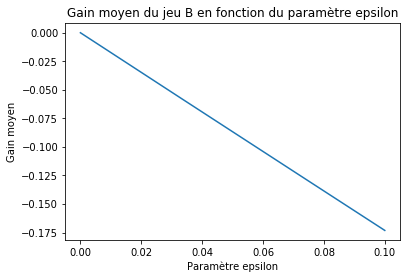

In [10]:
def gammaB (e) :
    p_0 = 1/10 - e
    p_1 = 3/4 - e
    C = 1 / (2 + p_0*(p_1**2) + (1 - p_0)*((1 - p_1)**2))
    pi0 = C*(1 - p_1*(1-p_1))
    pi1 = C*(1 - p_1*(1-p_0))
    pi2 = C*(1 - p_0*(1-p_1))
    return (2*p_0 - 1)*pi0 + (2*p_1 - 1)*(pi1 + pi2)

eps_min = 0
eps_max = 1/10
nb_valeurs = 200

X = np.linspace(eps_min,eps_max,nb_valeurs)
T = gammaB(X)
plt.plot(X,T)
plt.xlabel("Paramètre epsilon")
plt.ylabel("Gain moyen")
plt.title("Gain moyen du jeu B en fonction du paramètre epsilon")
plt.show()

Nous avons pour tout $\varepsilon > 0$ que $\gamma_{B}(\varepsilon) < 0$ et de plus que $\frac{S_{n}^B}{n} \overset{p.s}{\underset{n\to +\infty}{\longrightarrow}} \gamma_{B}$ d'après la version généralisée de la loi des grands nombres (admise).

Ainsi pour tout $\varepsilon > 0$ nous avons :

\begin{equation*}
S_{n}^{B}\overset{p.s}{\underset{n\to +\infty}{\longrightarrow}} -\infty
\end{equation*}

C'est bien ce que nous avions conjecturé.

## Partie 2 : Mélange de jeux

### Question S3
Ci-dessous, les différents programmes qui permettent d'afficher l'évolution du gain sur plusieurs trajectoires et un histogramme de la loi de $S_{n}^{A^rB^s}$.

In [11]:
#Renvoie l'évolution du gain total jusqu'à l'étape n du jeu (A^r)(B^s).

def trajectoireJeuArBs (n,r,s) :
    S = np.zeros(n+1) #S[i] représente le gain après i parties
    S[0] = 0
    for i in range (1,n+1) :
        gain = S[i-1]
        Nr = npr.rand(r)
        for j in range (r) :
            if (Nr[j] <= p) :
                gain += 1
            else :
                gain -= 1
        Ns = npr.rand(s)
        T = np.zeros(s+1) #T[j] représente le gain après j lancers pour la partie i de jeu B
        T[0] = gain
        for j in range (1,s+1) :
            if (T[j-1]%3 == 0) :
                if (Ns[j-1] <= p0) :
                    T[j] = T[j-1] + 1
                else :
                    T[j] = T[j-1] - 1
            else :
                if (Ns[j-1] <= p1) :
                    T[j] = T[j-1] + 1
                else :
                    T[j] = T[j-1] - 1
        S[i] = T[s]
    return S

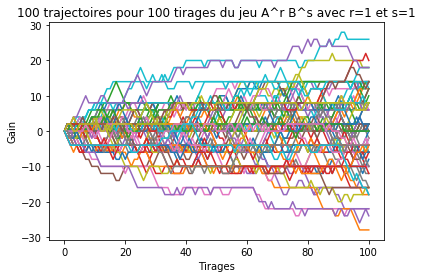

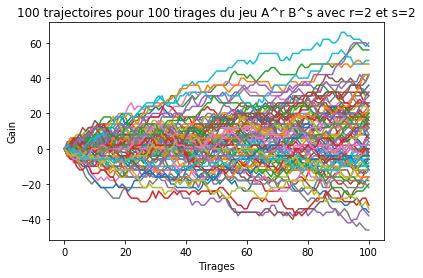

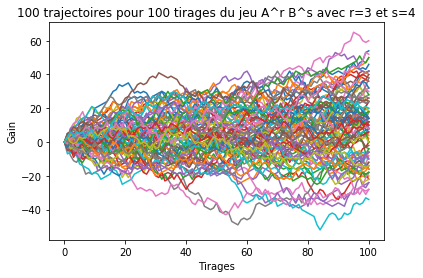

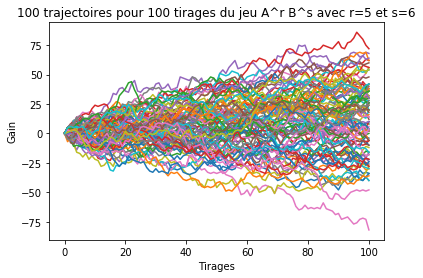

In [12]:
#Affiche une superposition de trajectoires pour le gain total du jeu (A^r)(B^s).

def superpositionJeuArBs (nb_traj,n,r,s) :
    X = np.arange(n+1)
    for i in range (nb_traj) :
        plt.plot(X,trajectoireJeuArBs(n,r,s))
    plt.xlabel("Tirages")
    plt.ylabel("Gain")
    plt.title(f"{nb_traj} trajectoires pour {n} tirages du jeu A^r B^s avec r={r} et s={s}")
    plt.show()
    
nb_traj = 100
n = 100

for (r,s) in [(1,1),(2,2),(3,4),(5,6)] :
    superpositionJeuArBs(nb_traj,n,r,s)

In [13]:
#Renvoie la valeur Sn pour des paramètres n,r,s donnés pour le jeu (A^r)(B^s).

def jeuArBs (n,r,s) :
    return trajectoireJeuArBs(n,r,s)[n]

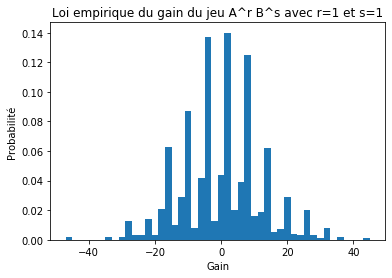

La moyenne expérimentale des gains après 150 lancers pour 1000 simulations et (r,s)=(1,1) vaut 0.066.


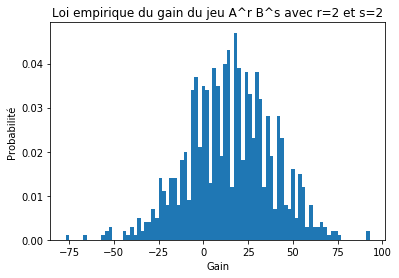

La moyenne expérimentale des gains après 150 lancers pour 1000 simulations et (r,s)=(2,2) vaut 14.892.


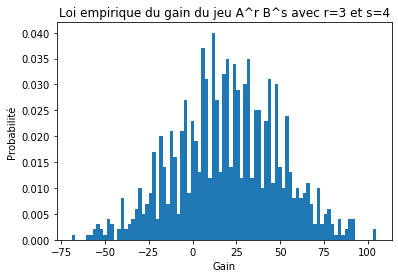

La moyenne expérimentale des gains après 150 lancers pour 1000 simulations et (r,s)=(3,4) vaut 20.09.


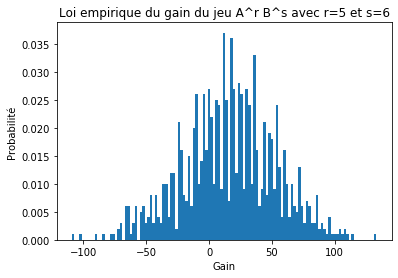

La moyenne expérimentale des gains après 150 lancers pour 1000 simulations et (r,s)=(5,6) vaut 15.864.


In [14]:
#Affiche un histogramme de la loi de Sn pour le jeu (A^r)(B^s).

def histogrammeJeuArBs (nb_sim,n,r,s) :
    sample = np.zeros(nb_sim, dtype=np.int)
    m = 0
    for i in range (nb_sim) :
        jeu = jeuArBs(n,r,s)
        sample[i] = jeu
        m += jeu
    M = m/nb_sim #moyenne des tirages
    a = np.min(sample)
    b = np.max(sample)
    X = np.arange(b-a+1) + a
    proba = np.bincount(sample-a)/nb_sim
    plt.bar(X, proba, width=2.0)
    plt.xlabel("Gain")
    plt.ylabel("Probabilité")
    plt.title(f"Loi empirique du gain du jeu A^r B^s avec r={r} et s={s}")
    plt.show()
    print(f"La moyenne expérimentale des gains après {n} lancers pour {nb_sim} simulations et (r,s)=({r},{s}) vaut {M}.")
    
nb_sim = 1000
n = 150

for (r,s) in [(1,1),(2,2),(3,4),(5,6)] :
    histogrammeJeuArBs(nb_sim,n,r,s)

Au vu des simulations, nous conjecturons pour certaines valeurs de $r$ et $s$ (par exemple pour $r = s = 2$) :

\begin{equation*}
S_{n}^{A^rB^s}\overset{p.s}{\underset{n\to +\infty}{\longrightarrow}} +\infty
\end{equation*}

Nous avons donc envie de jouer à ce jeu dans le cas $r = s = 2$.

Nous remarquons le côté paradoxal de cette situation puisque une combinaison de jeux perdants donne un jeu gagnant.

### Question T6

Nous considérons dans cette question $\varepsilon = 0$. Les produits matriciels sont calculés à l'aide de Python pour éviter de lourds calculs.

Les variables sont stockées sous forme de fraction afin d'obtenir les matrices directement sous la forme demandée.
<br/>
Ainsi au début de l'entrée nous remplaçons les valeurs de $p$, $p_0$ et $p_1$ par des fractions ayant les valeurs correspondant à $\varepsilon = 0$, sans oublier de leur redonner leur valeur utilisée dans le reste du sujet à la fin de l'entrée.

In [15]:
p = Fraction(1,2)
p0 = Fraction(1,10)
p1 = Fraction(3,4)

#Création des matrices de transition des jeux A et B.

A = zeros(3,3)
A[0,0] = Fraction(0,1)
A[1,1] = Fraction(0,1)
A[2,2] = Fraction(0,1)
A[0,1] = p
A[0,2] = 1-p
A[1,0] = 1-p
A[1,2] = p
A[2,0] = p
A[2,1] = 1-p

B = zeros(3,3)
B[0,0] = Fraction(0,1)
B[1,1] = Fraction(0,1)
B[2,2] = Fraction(0,1)
B[0,1] = p0
B[0,2] = 1-p0
B[1,0] = 1-p1
B[1,2] = p1
B[2,0] = p1
B[2,1] = 1-p1

#Calcul des matrices de transition des jeux AB et (A^2)(B^2) avec la formule donnée dans l'énoncé.

PAB = A*B
print(PAB)

PA2B2 = (A*A)*(B*B)
print(PA2B2)

p = 1/2 - eps
p0 = 1/10 - eps
p1 = 3/4 - eps

Matrix([[1/2, 1/8, 3/8], [3/8, 7/40, 9/20], [1/8, 1/20, 33/40]])
Matrix([[81/160, 59/320, 99/320], [151/320, 29/160, 111/320], [111/320, 47/320, 81/160]])


Ainsi nous avons pour $r = s = 1$ :
\begin{equation*}
P_{AB} = \frac{1}{40}
\begin{pmatrix} 
20 & 5 & 15 \\ 
15 & 7 & 18 \\ 
5 & 2 & 33 
\end{pmatrix}
\end{equation*}

Et pour $r = s = 2$ :
\begin{equation*}
P_{A^2B^2} = \frac{1}{320}
\begin{pmatrix} 
162 & 59 & 99 \\ 
151 & 58 & 111 \\ 
111 & 47 & 162 
\end{pmatrix}
\end{equation*}

Nous allons désormais résoudre les systèmes donnés par le théorème sur les chaînes de Markov irréductibles afin de déteminer les lois stationnaires.
<br/>
Ces systèmes s'écrivent sous forme matricielle $\pi P = \pi$, d'où $(~^tP-I_3)~^t\pi=0$.

Comme dans la question T3, nous remplaçons la troisième équation du système par l'équation $\pi(0) + \pi(1) + \pi(2) = 1$ pour s'assurer que le système est inversible. Nous obtenons alors une matrice $P'$ telle que $P'~^t\pi=Z$ où $Z=~^t(0,0,1)$, puis nous utilisons la méthode ```LUsolve``` de la bibliothèque ```sympy``` pour résoudre le système.

In [16]:
p = Fraction(1,2)
p0 = Fraction(1,10)
p1 = Fraction(3,4)

A = zeros(3,3)
A[0,0] = Fraction(0,1)
A[1,1] = Fraction(0,1)
A[2,2] = Fraction(0,1)
A[0,1] = p
A[0,2] = 1-p
A[1,0] = 1-p
A[1,2] = p
A[2,0] = p
A[2,1] = 1-p

B = zeros(3,3)
B[0,0] = Fraction(0,1)
B[1,1] = Fraction(0,1)
B[2,2] = Fraction(0,1)
B[0,1] = p0
B[0,2] = 1-p0
B[1,0] = 1-p1
B[1,2] = p1
B[2,0] = p1
B[2,1] = 1-p1

PAB = A*B

PA2B2 = (A*A)*(B*B)



#Résolution du système pour PAB, en la transformant d'abord en E = P'AB.

D = zeros(3,3)
D[1,0] = PAB[1,0]
D[2,0] = PAB[2,0]
D[0,1] = PAB[0,1]
D[2,1] = PAB[2,1]
D[0,0] = PAB[0,0] - 1
D[1,1] = PAB[1,1] - 1
D[0,2] = 1
D[1,2] = 1
D[2,2] = 1
E = transpose(D)

Z = Matrix(3,1,[Fraction(0),Fraction(0),Fraction(1)])

#Vérification que E est bien inversible.

print(f"Le déterminant de P'AB est {det(E)}, la matrice est bien inversible.")

#Calcul de la solution du système.

x = E.LUsolve(Z)
print(f"La loi stationnaire du jeu AB est {x}.")



#Résolution du système pour PA2B2, en la transformant d'abord en E2 = P'A2B2.

D2 = zeros(3,3)
D2[1,0] = PA2B2[1,0]
D2[2,0] = PA2B2[2,0]
D2[0,1] = PA2B2[0,1]
D2[2,1] = PA2B2[2,1]
D2[0,0] = PA2B2[0,0] - 1
D2[1,1] = PA2B2[1,1] - 1
D2[0,2] = 1
D2[1,2] = 1
D2[2,2] = 1
E2 = transpose(D2)

Z2 = Matrix(3,1,[Fraction(0),Fraction(0),Fraction(1)])

#Vérification que E2 est bien inversible.

print(f"Le déterminant de P'(A^2)(B^2) est {det(E2)}, la matrice est bien inversible.")

#Calcul de la solution du système.

x2 = E2.LUsolve(Z2)
print(f"La loi stationnaire du jeu (A^2)(B^2) est {x2}.")



p = 1/2 - eps
p0 = 1/10 - eps
p1 = 3/4 - eps

Le déterminant de P'AB est 169/320, la matrice est bien inversible.
La loi stationnaire du jeu AB est Matrix([[3/13], [1/13], [9/13]]).
Le déterminant de P'(A^2)(B^2) est 82641/102400, la matrice est bien inversible.
La loi stationnaire du jeu (A^2)(B^2) est Matrix([[2783/6357], [1075/6357], [833/2119]]).


Nous en déduisons ainsi les valeurs des lois stationnaires pour les deux jeux :

\begin{equation*}
\begin{cases}
\pi_{AB}(0) = \frac{3}{13} \\
\pi_{AB}(1) = \frac{1}{13} \\
\pi_{AB}(2) = \frac{9}{13}
\end{cases}
\text{   et   }
\begin{cases}
\pi_{A^2B^2}(0) = \frac{2783}{6357} \\
\pi_{A^2B^2}(1) = \frac{1075}{6357} \\
\pi_{A^2B^2}(2) = \frac{2499}{6357}
\end{cases}
\end{equation*}

Notons ${(AB)}_{i}$ le gain du jeu $AB$ au tour $i$. Les variables aléatoires ${(AB)}_{i}$ sont à valeurs dans $\{-2,0,2\}$.
<br/>
Le gain total après le tour $n$ est donné par $S_{n}^{AB} = \sum\limits_{i=1}^{n}{(AB)}_{i}$, d'où le gain moyen au tour $n$ est $\gamma_{AB,n} = E({(AB)}_{n}) = E(S_{n}^{AB}-S_{n-1}^{AB})$.
<br/>
Ainsi on a $\gamma_{AB,n+1} = 2(P(S_{n+1}^{AB} - S_{n}^{AB} = 2) - P(S_{n+1}^{AB} - S_{n}^{AB} = -2))$.

De plus on a $X_n^{AB} \equiv S_n^{AB} \pmod 3$, d'où $P(S_{n+1}^{AB} - S_{n}^{AB} = 2) = P(X_{n+1}^{AB} - X_{n}^{AB} = 2)$ et $P(S_{n+1}^{AB} - S_{n}^{AB} = -2) = P(X_{n+1}^{AB} - X_{n}^{AB} = 1)$.

Par formule des probabilités totales :

\begin{align*}
P(X_{n+1}^{AB} - X_{n}^{AB} = 1) &= P(X_{n+1}^{AB} = 1~| X_n^{AB} = 0)~P(X_n^{AB}=0) \\
                       &+ P(X_{n+1}^{AB} = 2~| X_n^{AB} = 1)~P(X_n^{AB}=1) \\
                       &+ P(X_{n+1}^{AB} = 0~| X_n^{AB} = 2)~P(X_n^{AB}=2) \\
                       &= P_{AB}(0,1) \pi_{AB}(0) + P_{AB}(1,2) \pi_{AB}(1) + P_{AB}(2,0) \pi_{AB}(2) \\
                       &= \frac{5}{40} \frac{3}{13} + \frac{18}{40} \frac{1}{13} + \frac{5}{40} \frac{9}{13} \\
                       &= \frac{78}{520} \\
                       &= \frac{3}{20} \\
                       & \\
P(X_{n+1}^{AB} - X_{n}^{AB} = 2) &= P(X_{n+1}^{AB} = 2~| X_n^{AB} = 0)~P(X_n^{AB}=0) \\
                       &+ P(X_{n+1}^{AB} = 0~| X_n^{AB} = 1)~P(X_n^{AB}=1) \\
                       &+ P(X_{n+1}^{AB} = 1~| X_n^{AB} = 2)~P(X_n^{AB}=2) \\
                       &= P_{AB}(0,2) \pi_{AB}(0) + P_{AB}(1,0) \pi_{AB}(1) + P_{AB}(2,1) \pi_{AB}(2) \\
                       &= \frac{15}{40} \frac{3}{13} + \frac{15}{40} \frac{1}{13} + \frac{2}{40} \frac{9}{13} \\
                       &= \frac{78}{520} \\
                       &= \frac{3}{20}
\end{align*}

Ainsi $\gamma_{AB,n}$ est indépendant de $n$ et nous avons finalement :

\begin{equation*}
\gamma_{AB} = 0
\end{equation*}

Pour le calcul du gain moyen $\gamma_{A^2B^2}$, le principal problème est qu'il n'est plus possible d'écrire les égalités de probabilités entre $S_{n+1}^{A^2B^2}-S_{n}^{A^2B^2}$ et $X_{n+1}^{A^2B^2}-X_{n}^{A^2B^2}$ puisque les variables aléatoires $(A^2B^2)_i$ sont à valeurs dans $\{-4,-2,0,2,4\}$ qui n'est plus en bijection avec $\{0,1,2\}$.

### Question T7

Nous avons $\gamma_{A^2B^2}(0) = \frac{16}{163} > 0$, d'où par continuité de la fonction $\varepsilon \mapsto \gamma_{A^2B^2}(\varepsilon)$, nous avons pour $\varepsilon > 0$ suffisamment petit que $\gamma_{A^2B^2}(\varepsilon) > 0$.

Ainsi pour $\varepsilon > 0$ suffisamment petit nous avons :

\begin{equation*}
S_{n}^{A^2B^2}\overset{p.s}{\underset{n\to +\infty}{\longrightarrow}} +\infty
\end{equation*}

C'est bien ce que nous avions conjecturé.

Pour le jeu $AB$, c'est plus compliqué car $\gamma_{AB}(0) = 0$.

Cela signifie que pour $\varepsilon = 0$, le jeu $AB$ est parfaitement équitable. Intuitivement, puisque augmenter $\varepsilon$ rend les deux jeux $A$ et $B$ plus perdants, nous pouvons conjecturer que cela rend également le gain moyen du jeu $AB$ strictement négatif.

Ainsi nous conjecturons que pour tout $\varepsilon > 0$, nous avons $\gamma_{AB}(\varepsilon) < 0$ et :

\begin{equation*}
S_{n}^{AB}\overset{p.s}{\underset{n\to +\infty}{\longrightarrow}} -\infty
\end{equation*}

Nous pouvons vérifier cela en traçant la courbe de la fonction $\varepsilon \mapsto \gamma_{AB}(\varepsilon)$ sur l'intervalle $[0,\frac{1}{10}[$ en reprenant l'expression :

\begin{equation*}
\gamma_{AB} = 2((P_{AB}(0,2)-P_{AB}(0,1)) \pi_{AB}(0) + (P_{AB}(1,0)-P_{AB}(1,2)) \pi_{AB}(1) + (P_{AB}(2,1)-P_{AB}(2,0)) \pi_{AB}(2))
\end{equation*}

In [17]:
#Renvoie la valeur de gammaAB pour un epsilon sous forme fractionnelle.

def gammaAB(e) :
    p = Fraction(1,2) - e
    p0 = Fraction(1,10) - e
    p1 = Fraction(3,4) - e
    
    A = zeros(3,3)
    A[0,0] = Fraction(0,1)
    A[1,1] = Fraction(0,1)
    A[2,2] = Fraction(0,1)
    A[0,1] = p
    A[0,2] = 1-p
    A[1,0] = 1-p
    A[1,2] = p
    A[2,0] = p
    A[2,1] = 1-p

    B = zeros(3,3)
    B[0,0] = Fraction(0,1)
    B[1,1] = Fraction(0,1)
    B[2,2] = Fraction(0,1)
    B[0,1] = p0
    B[0,2] = 1-p0
    B[1,0] = 1-p1
    B[1,2] = p1
    B[2,0] = p1
    B[2,1] = 1-p1
    
    PAB = A*B
    
    D = zeros(3,3)
    D[1,0] = PAB[1,0]
    D[2,0] = PAB[2,0]
    D[0,1] = PAB[0,1]
    D[2,1] = PAB[2,1]
    D[0,0] = PAB[0,0] - 1
    D[1,1] = PAB[1,1] - 1
    D[0,2] = 1
    D[1,2] = 1
    D[2,2] = 1
    E = transpose(D)

    Z = Matrix(3,1,[Fraction(0),Fraction(0),Fraction(1)])
    X = E.LUsolve(Z)
    
    p = 1/2 - eps
    p0 = 1/10 - eps
    p1 = 3/4 - eps
    
    return 2*((PAB[0,2]-PAB[0,1])*X[0] + (PAB[1,0] - PAB[1,2])*X[1] + (PAB[2,1] - PAB[2,0])*X[2])

La fonction précédente prend en argument un $\varepsilon$ de type ```Fraction``` pour renvoyer la valeur $\gamma_{AB}(\varepsilon)$. Afin de pouvoir tracer le gain moyen, nous ne pouvons plus utiliser la fonction ```linspace``` de ```numpy```, il faut créer une abscisse de fractions à la main.

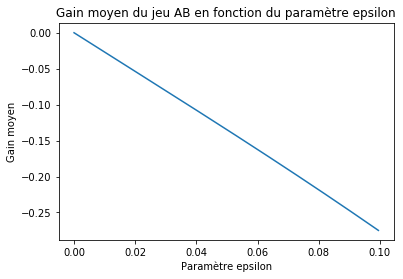

In [18]:
#Affiche le graphe de gammaAB.

eps_min = Fraction(0,1)
eps_max = Fraction(1,10)
nb_valeurs = 200

a = (eps_max - eps_min) / nb_valeurs
b = floor(1/a)
X = np.zeros(nb_valeurs)
T = np.zeros(nb_valeurs)

for i in range(nb_valeurs) :
    X[i] = eps_min + Fraction(i,b)
    T[i] = gammaAB(X[i])

plt.plot(X,T)
plt.xlabel("Paramètre epsilon")
plt.ylabel("Gain moyen")
plt.title("Gain moyen du jeu AB en fonction du paramètre epsilon")
plt.show()

Ainsi pour tout $\varepsilon > 0$ nous avons :

\begin{equation*}
S_{n}^{AB}\overset{p.s}{\underset{n\to +\infty}{\longrightarrow}} -\infty
\end{equation*}

C'est bien ce que nous avions conjecturé.

## Partie 3 : Mélange aléatoire

### Question S4

Ci-dessous, les différents programmes qui permettent d'afficher l'évolution du gain sur plusieurs trajectoires et un histogramme de la loi de $S_{n}^C$.

In [19]:
#Renvoie l'évolution du gain total jusqu'à l'étape n du jeu C.

def trajectoireJeuC (n):
    S = np.zeros(n+1) #S[i] représente le gain après i parties
    S[0] = 0
    for i in range(1,n+1) :
        alea = npr.rand(1)
        r = npr.rand(1) 
        if (alea <= 0.5) :
            if (r <= p) :
                S[i] = S[i-1] + 1
            else :
                S[i] = S[i-1] - 1
        else :
            if (S[i-1]%3 == 0) :
                if (r <= p0) :
                    S[i] = S[i-1] + 1
                else :
                    S[i] = S[i-1] - 1
            else :
                if (r <= p1) :
                    S[i] = S[i-1] + 1
                else :
                    S[i] = S[i-1] - 1
    return S

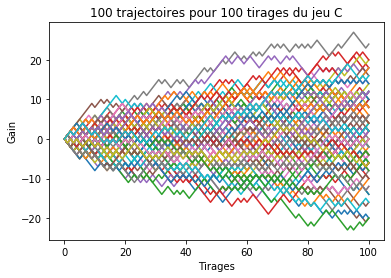

In [20]:
#Affiche une superposition de trajectoires pour le gain total du jeu C.

def superpositionJeuC (nb_traj,n) :
    X = np.arange(n+1)
    for i in range (nb_traj) :
        plt.plot(X,trajectoireJeuC(n))
    plt.xlabel("Tirages")
    plt.ylabel("Gain")
    plt.title(f"{nb_traj} trajectoires pour {n} tirages du jeu C")
    plt.show()
    
nb_traj = 100
n = 100
    
superpositionJeuC(nb_traj,n)

In [21]:
#Renvoie la valeur Sn pour un n donné pour le jeu C.

def jeuC (n) :
    return trajectoireJeuC(n)[n]

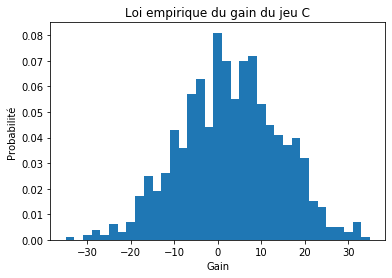

La moyenne expérimentale des gains après 150 lancers pour 1000 simulations vaut 2.92.


In [22]:
#Affiche un histogramme de la loi de Sn pour le jeu C.

def histogrammeJeuC (nb_sim,n) :
    sample = np.zeros(nb_sim, dtype=np.int)
    m = 0
    for i in range (nb_sim) :
        jeu = jeuC(n)
        sample[i] = jeu
        m += jeu
    M = m/nb_sim #moyenne des tirages
    a = np.min(sample)
    b = np.max(sample)
    X = np.arange(b-a+1) + a
    proba = np.bincount(sample-a)/nb_sim
    plt.bar(X, proba, width=2.0)
    plt.xlabel("Gain")
    plt.ylabel("Probabilité")
    plt.title("Loi empirique du gain du jeu C")
    plt.show()
    print(f"La moyenne expérimentale des gains après {n} lancers pour {nb_sim} simulations vaut {M}.")
    
nb_sim = 1000
n = 150

histogrammeJeuC(nb_sim,n)

Au vu des simulations, nous conjecturons que :

\begin{equation*}
S_{n}^{C}\overset{p.s}{\underset{n\to +\infty}{\longrightarrow}} +\infty
\end{equation*}

Nous avons donc envie de jouer à ce jeu.

Une fois de plus, nous remarquons le côté paradoxal de la situation, puisque jouer aléatoirement à deux jeux perdants semble donner un jeu gagnant.

### Question T8

Nous considérons dans cette question $\varepsilon = 0$. Nous notons $(Y_n)_{n \in \mathbb{N}}$ la suite i.i.d de variables aléatoires de Bernoulli de paramètre $\frac{1}{2}$ qui représente le résultat du pile ou face du tour $n$ (si $Y_n = 0$ le jeu $A$ est choisi, sinon c'est le jeu $B$).

Alors pour toute paire $(i,j) \in \{0,1,2\}^2$ et pour tout $n \in \mathbb{N}$ nous avons (puisque $X_n$ et $Y_{n+1}$ sont indépendants) :

\begin{align*}
P_{C}(i,j) &= P(X_{n+1}^C = j ~|X_n^C = i) \\
           &= P(X_{n+1}^C = j, Y_{n+1} = 0 ~|X_n^C = i) + P(X_{n+1}^C = j, Y_{n+1} = 1 ~|X_n^C = i) \\
           &= P(Y_{n+1} = 0) \frac{P(X_{n+1}^C = j, Y_{n+1} = 0, X_n^C = i)}{P(Y_{n+1} = 0)P(X_n^C = i)} + P(Y_{n+1} = 1) \frac{P(X_{n+1}^C = j, Y_{n+1} = 1, X_n^C = i)}{P(Y_{n+1} = 1)P(X_n^C = i)} \\
           &= P(Y_{n+1} = 0) \frac{P(X_{n+1}^C = j, Y_{n+1} = 0, X_n^C = i)}{P(Y_{n+1} = 0, X_n^C = i)} + P(Y_{n+1} = 1) \frac{P(X_{n+1}^C = j, Y_{n+1} = 1, X_n^C = i)}{P(Y_{n+1} = 1, X_n^C = i)} \\
           &= P(Y_{n+1} = 0)P(X_{n+1}^C = j ~| Y_{n+1} = 0, X_n^C = i) + P(Y_{n+1} = 1)P(X_{n+1}^C = j~| Y_{n+1} = 1, X_n^C = i)\\
           &=  \frac{1}{2}(P_{A}(i,j) + P_{B}(i,j))
\end{align*}

Ainsi nous avons :
\begin{equation*}
P_C = \frac{1}{2}(P_A + P_B) = \frac{1}{40}
\begin{pmatrix} 
0 & 12 & 28 \\ 
15 & 0 & 25 \\ 
25 & 15 & 0 
\end{pmatrix}
\end{equation*}

Nous allons désormais résoudre le système donné par le théorème sur les chaînes de Markov irréductibles afin de déteminer la loi stationnaire, comme à la question T6.

In [23]:
PC = zeros(3,3)
PC[0,0] = Fraction(0,1)
PC[1,1] = Fraction(0,1)
PC[2,2] = Fraction(0,1)
PC[0,1] = Fraction(12,40)
PC[0,2] = Fraction(28,40)
PC[1,0] = Fraction(15,40)
PC[1,2] = Fraction(25,40)
PC[2,0] = Fraction(25,40)
PC[2,1] = Fraction(15,40)

#Résolution du système pour PC, en la transformant d'abord en E = P'C.

D = zeros(3,3)
D[1,0] = PC[1,0]
D[2,0] = PC[2,0]
D[0,1] = PC[0,1]
D[2,1] = PC[2,1]
D[0,0] = PC[0,0] - 1
D[1,1] = PC[1,1] - 1
D[0,2] = 1
D[1,2] = 1
D[2,2] = 1
E = transpose(D)

Z = Matrix(3,1,[Fraction(0),Fraction(0),Fraction(1)])

#Vérification que E est bien inversible.

print(f"Le déterminant de C est {det(E)}, la matrice est bien inversible.")

#Calcul de la solution du système.

x = E.LUsolve(Z)
print(f"La loi stationnaire du jeu C est {x}.")

Le déterminant de C est 709/320, la matrice est bien inversible.
La loi stationnaire du jeu C est Matrix([[245/709], [180/709], [284/709]]).


Nous en déduisons les valeurs des lois stationnaires pour le jeu C :

\begin{equation*}
\begin{cases}
\pi_{C}(0) = \frac{245}{709} \\
\pi_{C}(1) = \frac{180}{709} \\
\pi_{C}(2) = \frac{284}{709}
\end{cases}
\end{equation*}

Notons $C_{i}$ le gain du jeu $C$ au tour $i$. Les variables aléatoires $C_{i}$ sont à valeurs dans $\{-1,1\}$.
<br/>
Le gain total après le tour $n$ est donné par $S_{n}^C = \sum\limits_{i=1}^{n}C_{i}$, d'où le gain moyen au tour $n$ est $\gamma_{C,n} = E(C_{n}) = E(S_{n}^C-S_{n-1}^C)$.
<br/>
Ainsi on a $\gamma_{C,n+1} = P(S_{n+1}^C - S_{n}^C = 1) - P(S_{n+1}^C - S_{n}^C = -1)$.

De plus on a $X_n^C \equiv S_n^C \pmod 3$, d'où $P(S_{n+1}^C - S_{n}^C = 1) = P(X_{n+1}^C - X_{n}^C = 1)$ et $P(S_{n+1}^C - S_{n}^C = -1) = P(X_{n+1}^C - X_{n}^C = 2)$.

Par formule des probabilités totales :

\begin{align*}
P(X_{n+1}^C - X_{n}^C = 1) &= P(X_{n+1}^C = 1~| X_n^C = 0)~P(X_n^C=0) \\
                       &+ P(X_{n+1}^C = 2~| X_n^C = 1)~P(X_n^C=1) \\
                       &+ P(X_{n+1}^C = 0~| X_n^C = 2)~P(X_n^C=2) \\
                       &= P_{C}(0,1) \pi_{C}(0) + P_{C}(1,2) \pi_{C}(1) + P_{C}(2,0) \pi_{C}(2) \\
                       &= \frac{12}{40} \frac{245}{709} + \frac{25}{40} \frac{180}{709} + \frac{25}{40} \frac{284}{709} \\
                       &= \frac{727}{1418} \\
                       & \\
P(X_{n+1}^C - X_{n}^C = 2) &= P(X_{n+1}^C = 2~| X_n^C = 0)~P(X_n^C=0) \\
                       &+ P(X_{n+1}^C = 0~| X_n^C = 1)~P(X_n^C=1) \\
                       &+ P(X_{n+1}^C = 1~| X_n^C = 2)~P(X_n^C=2) \\
                       &= P_{C}(0,2) \pi_{C}(0) + P_{C}(1,0) \pi_{C}(1) + P_{C}(2,1) \pi_{C}(2) \\
                       &= \frac{28}{40} \frac{245}{709} + \frac{15}{40} \frac{180}{709} + \frac{15}{40} \frac{284}{709} \\
                       &= \frac{691}{1418} \\
                       & \\
\end{align*}

Ainsi $\gamma_{C,n}$ est indépendant de $n$ et nous avons finalement :

\begin{equation*}
\gamma_{C} = \frac{727-691}{1418} = \frac{18}{709}
\end{equation*}

### Question T9

Nous avons $\gamma_{C}(0) = \frac{18}{709} > 0$, d'où par continuité de la fonction $\varepsilon \mapsto \gamma_{C}(\varepsilon)$, nous avons pour $\varepsilon > 0$ suffisamment petit que $\gamma_{C}(\varepsilon) > 0$.

Ainsi pour $\varepsilon > 0$ suffisamment petit nous avons :

\begin{equation*}
S_{n}^C\overset{p.s}{\underset{n\to +\infty}{\longrightarrow}} +\infty
\end{equation*}

C'est bien ce que nous avions conjecturé.

### Question S5

Ci-dessous, les différents programmes qui permettent d'afficher l'évolution du gain sur plusieurs trajectoires et un histogramme de la loi de $S_{n}^{C(\alpha)}$ où $\alpha \in ]0,1[$. Nous considérons dans cette question $\varepsilon = 0$ et nous prenons donc soin de modifier les valeurs de $p$, $p_0$ et $p_1$ au début et à la fin de chaque programme de calcul ou d'affichage.

In [24]:
#Renvoie l'évolution du gain total jusqu'à l'étape n du jeu C(alpha).

def trajectoireJeuCalpha (n,alpha):
    S = np.zeros(n+1) #S[i] représente le gain après i parties
    S[0] = 0
    for i in range(1,n+1) :
        alea = npr.rand(1)
        r = npr.rand(1) 
        if (alea <= alpha) :
            if (r <= p) :
                S[i] = S[i-1] + 1
            else :
                S[i] = S[i-1] - 1
        else :
            if (S[i-1]%3 == 0) :
                if (r <= p0) :
                    S[i] = S[i-1] + 1
                else :
                    S[i] = S[i-1] - 1
            else :
                if (r <= p1) :
                    S[i] = S[i-1] + 1
                else :
                    S[i] = S[i-1] - 1
    return S

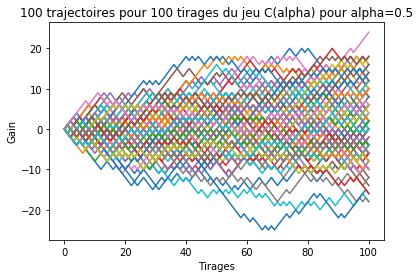

In [25]:
#Affiche une superposition de trajectoires pour le gain total du jeu C(alpha).

p = Fraction(1,2)
p0 = Fraction(1,10)
p1 = Fraction(3,4)

def superpositionJeuCalpha (nb_traj,n,alpha) :
    X = np.arange(n+1)
    for i in range (nb_traj) :
        plt.plot(X,trajectoireJeuCalpha(n,alpha))
    plt.xlabel("Tirages")
    plt.ylabel("Gain")
    plt.title(f"{nb_traj} trajectoires pour {n} tirages du jeu C(alpha) pour alpha={alpha}")
    plt.show()
    
nb_traj = 100
n = 100
alpha = 0.5
    
superpositionJeuCalpha(nb_traj,n,alpha)

p = 1/2 - eps
p0 = 1/10 - eps
p1 = 3/4 - eps

In [26]:
#Renvoie la valeur Sn pour un n donné pour le jeu C(alpha).

def jeuCalpha (n,alpha) :
    return trajectoireJeuCalpha(n,alpha)[n]

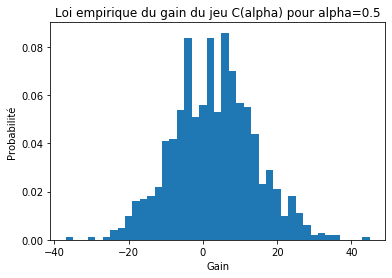

La moyenne expérimentale des gains après 150 lancers pour 1000 simulations et alpha=0.5 vaut 2.976.


In [27]:
#Affiche un histogramme de la loi de Sn pour le jeu C(alpha).

p = Fraction(1,2)
p0 = Fraction(1,10)
p1 = Fraction(3,4)

def histogrammeJeuCalpha (nb_sim,n,alpha) :
    sample = np.zeros(nb_sim, dtype=np.int)
    m = 0
    for i in range (nb_sim) :
        jeu = jeuCalpha(n,alpha)
        sample[i] = jeu
        m += jeu
    M = m/nb_sim #moyenne des tirages
    a = np.min(sample)
    b = np.max(sample)
    X = np.arange(b-a+1) + a
    proba = np.bincount(sample-a)/nb_sim
    plt.bar(X, proba, width=2.0)
    plt.xlabel("Gain")
    plt.ylabel("Probabilité")
    plt.title(f"Loi empirique du gain du jeu C(alpha) pour alpha={alpha}")
    plt.show()
    print(f"La moyenne expérimentale des gains après {n} lancers pour {nb_sim} simulations et alpha={alpha} vaut {M}.")
    
nb_sim = 1000
n = 150
alpha = 0.5

histogrammeJeuCalpha(nb_sim,n,alpha)

p = 1/2 - eps
p0 = 1/10 - eps
p1 = 3/4 - eps

En faisant varier $\alpha$, nous remarquons que $\gamma_{C(\alpha)}(0)$ semble toujours rester strictement positif.

Au vu des simulations, nous conjecturons que pour tout $\alpha \in ]0,1[$ :

\begin{equation*}
S_{n}^{C(\alpha)}\overset{p.s}{\underset{n\to +\infty}{\longrightarrow}} +\infty
\end{equation*}

Quelle que soit la valeur de $\alpha$, la méthode de calcul de $\gamma_{C(\alpha)}$ est la même et nous pouvons donc tracer la fonction $\alpha \mapsto \gamma_{C(\alpha)}(0)$.

In [28]:
p = Fraction(1,2)
p0 = Fraction(1,10)
p1 = Fraction(3,4)

A = zeros(3,3)
A[0,0] = Fraction(0,1)
A[1,1] = Fraction(0,1)
A[2,2] = Fraction(0,1)
A[0,1] = p
A[0,2] = 1-p
A[1,0] = 1-p
A[1,2] = p
A[2,0] = p
A[2,1] = 1-p

B = zeros(3,3)
B[0,0] = Fraction(0,1)
B[1,1] = Fraction(0,1)
B[2,2] = Fraction(0,1)
B[0,1] = p0
B[0,2] = 1-p0
B[1,0] = 1-p1
B[1,2] = p1
B[2,0] = p1
B[2,1] = 1-p1

#Renvoie la valeur de gammaCalpha pour un alpha donné.

def gammaCalpha (alpha):
    PCa = alpha*A + (1-alpha)*B
    D = zeros(3,3)
    D[1,0] = PCa[1,0]
    D[2,0] = PCa[2,0]
    D[0,1] = PCa[0,1]
    D[2,1] = PCa[2,1]
    D[0,0] = PCa[0,0] - 1
    D[1,1] = PCa[1,1] - 1
    D[0,2] = 1
    D[1,2] = 1
    D[2,2] = 1
    E = transpose(D)
    Z = Matrix(3,1,[Fraction(0),Fraction(0),Fraction(1)])
    x = E.LUsolve(Z)
    return (PCa[0,1] - PCa[0,2])*x[0] + (PCa[1,2] - PCa[1,0])*x[1] + (PCa[2,0] - PCa[2,1])*x[2]

alpha = 0.5
print(gammaCalpha(alpha))

p = 1/2 - eps
p0 = 1/10 - eps
p1 = 3/4 - eps

0.0253878702397743


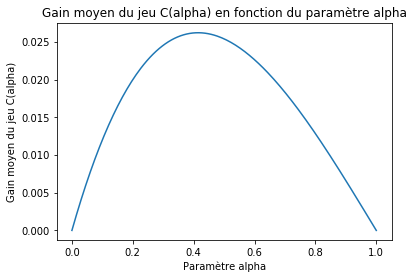

In [29]:
#Affiche le graphe du gain moyen du jeu C(alpha) en fonction de alpha.

nb_valeurs = 200

X = np.linspace(0,1,nb_valeurs)
T = np.zeros(nb_valeurs)

for i in range (nb_valeurs) :
    T[i] = gammaCalpha(X[i])

plt.plot(X,T)
plt.xlabel("Paramètre alpha")
plt.ylabel("Gain moyen du jeu C(alpha)")
plt.title("Gain moyen du jeu C(alpha) en fonction du paramètre alpha")
plt.show()

Nous avons pour tout $\alpha \in ]0,1[$ que $\gamma_{C(\alpha)}(0) > 0$, d'où par continuité de la fonction $\varepsilon \mapsto \gamma_{C(\alpha)}(\varepsilon)$, nous avons pour $\varepsilon > 0$ suffisamment petit que $\gamma_{C(\alpha)}(\varepsilon) > 0$.

Ainsi pour tout $\alpha \in ]0,1[$, pour $\varepsilon > 0$ suffisamment petit nous avons :

\begin{equation*}
S_{n}^{C(\alpha)}\overset{p.s}{\underset{n\to +\infty}{\longrightarrow}} +\infty
\end{equation*}

C'est bien ce que nous avions conjecturé.